# MPI MergeSort Strong Scaling Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['i0-p16-a262144.cali', 'i0-p2-a262144.cali', 'i1-p16-a16777216.cali', 'i3-p1-a1048576.cali', 'i2-p4-a1048576.cali', 'i3-p16-a65536.cali', 'i2-p1-a16777216.cali', 'i1-p2-a262144.cali', 'i1-p2-a65536.cali', 'i0-p2-a4194304.cali', 'i2-p8-a67108864.cali', 'i1-p4-a4194304.cali', 'i2-p8-a16777216.cali', 'i1-p32-a1048576.cali', 'i2-p8-a262144.cali', 'i3-p4-a4194304.cali', 'i2-p4-a65536.cali', 'i0-p32-a16777216.cali', 'i1-p2-a67108864.cali', 'i1-p64-a1048576.cali', 'i0-p16-a67108864.cali', 'i1-p16-a4194304.cali', 'i1-p1-a67108864.cali', 'i3-p2-a67108864.cali', 'i0-p1-a1048576.cali', 'i3-p4-a16777216.cali', 'i2-p1-a67108864.cali', 'i0-p8-a65536.cali', 'i0-p32-a1048576.cali', 'i3-p32-a4194304.cali', 'i1-p32-a16777216.cali', 'i0-p16-a65536.cali', 'i3-p2-a4194304.cali', 'i1-p8-a67108864.cali', 'i0-p2-a16777216.cali', 'i1-p2-a1048576.cali', 'i0-p4-a65536.cali', 'i2-p16-a1048576.cali', 'i1-p16-a65536.cali', 'i0-p2-a67108864.cali', 'i1-p8-a262144.cali', 'i1-p8-a65536.cali', 'i2-p32-a262144.cali', 'i

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(34236875, 'i1-p8-a262144.cali'),
             (35565938, 'i0-p64-a1048576.cali'),
             (55387066, 'i1-p4-a67108864.cali'),
             (94698835, 'i3-p8-a65536.cali'),
             (134814991, 'i2-p8-a4194304.cali'),
             (135477666, 'i2-p16-a67108864.cali'),
             (165441638, 'i3-p2-a1048576.cali'),
             (167256875, 'i1-p2-a67108864.cali'),
             (171913956, 'i3-p64-a4194304.cali'),
             (231101350, 'i0-p4-a67108864.cali'),
             (245653826, 'i0-p16-a4194304.cali'),
             (245729521, 'i2-p16-a16777216.cali'),
             (302580615, 'i3-p2-a67108864.cali'),
             (305887361, 'i2-p4-a16777216.cali'),
             (325567074, 'i1-p8-a16777216.cali'),
             (367984706, 'i3-p8-a67108864.cali'),
             (386351023, 'i2-p1-a16777216.cali'),
             (387379756, 'i0-p64-a4194304.cali'),
             (395292098, 'i0-p8-a67108864.cali'),
             (476558639, 'i1-p64-a4194304.cali'),
         

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
│     └─ -1.000 comm_small
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 data_init
└─ -1.000 data_validation

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            34236875      1   
                                                35565938      1   
                                                55387066      1   
                                                94698835      1   
                                                134814991     1   
                                                135477666     1   
                                                165441638     1   
                                                167256875     1   
                                                171913956     1   
                                                231101350     1   
                                                245653826     1   
                                                245729521     1   
                                                302580615     1   
                                                305887361     1   
                                                325567074     1   
                                                367984706     1   
                                                386351023     1   
                                                387379756     1   
                                                395292098     1   
                                                476558639     1   
                                                520790344     1   
                                                545627575     1   
                                                573341532     1   
                                                593021062     1   
                                                597904221     1   
                                                598074843     1   
                                                601510037     1   
                                                649148420     1   
                                                666300467     1   
                                                692068927     1   
                                                693749637     1   
                                                779858834     1   
                                                787259565     1   
                                                800245804     1   
                                                815340623     1   
                                                832364175     1   
                                                837248334     1   
                                                885712554     1   
                                                933051938     1   
                                                954082963     1   
                                                1024660577    1   
                                                1061536587    1   
                                                1119658259    1   
                                                1129094788    1   
                                                1136301661    1   
                                                1218834660    1   
                                                1251208741    1   
                                                1279880168    1   
                                                1345500930    1   
                                                1345714006    1   
                                                1346829297    1   
                                                1349488438    1   
                                                1355910130    1   
                                                1381391930    1   
                                                1402191423    1   
                                                1441475383    1   
                                                1463096894    1   
                                                1503249267    1   
                                        

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Variance time/rank"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                            profile                     
{'name': 'main', 'type': 'function'}            34236875         1.026351   
                                                35565938         3.881137   
                                                55387066       259.305960   
                                                94698835         0.626502   
                                                134814991        8.371054   
                                                135477666       63.771493   
                                                165441638        9.292026   
                                                167256875      522.658347   
                                                171913956        4.772743   
                                                231101350      249.421246   
                                                245653826        4.696420   
                                                245729521       16.398065   
                                                302580615      521.844702   
                                                305887361       63.796811   
                                                325567074       32.482282   
                                                367984706      129.083756   
                                                386351023      249.054943   
                                                387379756        4.431749   
                                                395292098      126.594465   
                                                476558639        4.679455   
                                                520790344        0.628973   
                                                545627575     1006.498488   
                                                573341532       16.511667   
                                                593021062        2.741089   
                                                597904221        0.631684   
                                                598074843        4.735398   
                                                601510037        9.189419   
                                                649148420        1.214821   
                                                666300467        8.498170   
                                                692068927      131.765503   
                                                693749637       64.674015   
                                                779858834        2.661277   
                                                787259565        1.995844   
                                                800245804        2.786485   
                                                815340623        1.445338   
                                                832364175        2.298174   
                                                837248334        1.043822   
                                                885712554      995.801520   
                                                933051938        2.730312   
                                                954082963        2.505010   
                                                1024660577       1.025334   
                                                1061536587       1.822433   
                                                1119658259       1.041394   
                                                1129094788       0.874051   
                                                1136301661       0.652286   
                                                1218834660       2.297252   
                                                1251208741      64.589366   
                                                1279880168       2.767393   
                                                1345500930       1.262660   
                                                1345714006       4.745004   
                                                13468292

Metadata

In [9]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
34236875             2.11.0-dev               8   
35565938             2.11.0-dev              64   
55387066             2.11.0-dev               4   
94698835             2.11.0-dev               8   
134814991            2.11.0-dev               8   
135477666            2.11.0-dev              16   
165441638            2.11.0-dev               2   
167256875            2.11.0-dev               2   
171913956            2.11.0-dev              64   
231101350            2.11.0-dev               4   
245653826            2.11.0-dev              16   
245729521            2.11.0-dev              16   
302580615            2.11.0-dev               2   
305887361            2.11.0-dev               4   
325567074            2.11.0-dev               8   
367984706            2.11.0-dev               8   
386351023            2.11.0-dev               1   
387379756            2.11.0-dev              64   
395292098            2.11.0-dev               8   
476558639            2.11.0-dev              64   
520790344            2.11.0-dev               8   
545627575            2.11.0-dev               1   
573341532            2.11.0-dev              16   
593021062            2.11.0-dev               8   
597904221            2.11.0-dev               4   
598074843            2.11.0-dev               4   
601510037            2.11.0-dev               2   
649148420            2.11.0-dev               1   
666300467            2.11.0-dev               8   
692068927            2.11.0-dev               2   
693749637            2.11.0-dev               4   
779858834            2.11.0-dev               2   
787259565            2.11.0-dev              16   
800245804            2.11.0-dev              64   
815340623            2.11.0-dev               4   
832364175            2.11.0-dev              32   
837248334            2.11.0-dev               2   
885712554            2.11.0-dev               1   
933051938            2.11.0-dev              64   
954082963            2.11.0-dev              64   
1024660577           2.11.0-dev               2   
1061536587           2.11.0-dev              32   
1119658259           2.11.0-dev               2   
1129094788           2.11.0-dev               8   
1136301661           2.11.0-dev               8   
1218834660           2.11.0-dev              32   
1251208741           2.11.0-dev              16   
1279880168           2.11.0-dev               8   
1345500930           2.11.0-dev              16   
1345714006           2.11.0-dev               4   
1346829297           2.11.0-dev               2   
1349488438           2.11.0-dev              32   
1355910130           2.11.0-dev              32   
1381391930           2.11.0-dev               4   
1402191423           2.11.0-dev              16   
1441475383           2.11.0-dev               2   
1463096894           2.11.0-dev               4   
1503249267           2.11.0-dev               8   
1545712314           2.11.0-dev              32   
1614746395           2.11.0-dev               2   
1625941908           2.11.0-dev               1   
1644148871           2.11.0-dev              64   
1654376694           2.11.0-dev              16   
1715039847           2.11.0-dev               4   
1719697928           2.11.0-dev               4   
1757670221           2.11.0-dev              32   
1816811437           2.11.0-dev               1   
1858311187           2.11.0-dev               2   
1910797916           2.11.0-dev               8   
1916591425           2.11.0-dev              16   
1932462589           2.11.0-dev               8   
1993683092           2.11.0-dev               4   
2045068710           2.11.0-dev               1   
2112423439           2.11.0-dev              32   
2113079843           2.11.0-dev               1   
2123376903           2.11.0-dev               2   
2183969429           2.11.0-dev  

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
34236875             2.11.0-dev               8   
35565938             2.11.0-dev              64   
55387066             2.11.0-dev               4   
94698835             2.11.0-dev               8   
134814991            2.11.0-dev               8   
135477666            2.11.0-dev              16   
165441638            2.11.0-dev               2   
167256875            2.11.0-dev               2   
171913956            2.11.0-dev              64   
231101350            2.11.0-dev               4   
245653826            2.11.0-dev              16   
245729521            2.11.0-dev              16   
302580615            2.11.0-dev               2   
305887361            2.11.0-dev               4   
325567074            2.11.0-dev               8   
367984706            2.11.0-dev               8   
386351023            2.11.0-dev               1   
387379756            2.11.0-dev              64   
395292098            2.11.0-dev               8   
476558639            2.11.0-dev              64   
520790344            2.11.0-dev               8   
545627575            2.11.0-dev               1   
573341532            2.11.0-dev              16   
593021062            2.11.0-dev               8   
597904221            2.11.0-dev               4   
598074843            2.11.0-dev               4   
601510037            2.11.0-dev               2   
649148420            2.11.0-dev               1   
666300467            2.11.0-dev               8   
692068927            2.11.0-dev               2   
693749637            2.11.0-dev               4   
779858834            2.11.0-dev               2   
787259565            2.11.0-dev              16   
800245804            2.11.0-dev              64   
815340623            2.11.0-dev               4   
832364175            2.11.0-dev              32   
837248334            2.11.0-dev               2   
885712554            2.11.0-dev               1   
933051938            2.11.0-dev              64   
954082963            2.11.0-dev              64   
1024660577           2.11.0-dev               2   
1061536587           2.11.0-dev              32   
1119658259           2.11.0-dev               2   
1129094788           2.11.0-dev               8   
1136301661           2.11.0-dev               8   
1218834660           2.11.0-dev              32   
1251208741           2.11.0-dev              16   
1279880168           2.11.0-dev               8   
1345500930           2.11.0-dev              16   
1345714006           2.11.0-dev               4   
1346829297           2.11.0-dev               2   
1349488438           2.11.0-dev              32   
1355910130           2.11.0-dev              32   
1381391930           2.11.0-dev               4   
1402191423           2.11.0-dev              16   
1441475383           2.11.0-dev               2   
1463096894           2.11.0-dev               4   
1503249267           2.11.0-dev               8   
1545712314           2.11.0-dev              32   
1614746395           2.11.0-dev               2   
1625941908           2.11.0-dev               1   
1644148871           2.11.0-dev              64   
1654376694           2.11.0-dev              16   
1715039847           2.11.0-dev               4   
1719697928           2.11.0-dev               4   
1757670221           2.11.0-dev              32   
1816811437           2.11.0-dev               1   
1858311187           2.11.0-dev               2   
1910797916           2.11.0-dev               8   
1916591425           2.11.0-dev              16   
1932462589           2.11.0-dev               8   
1993683092           2.11.0-dev               4   
2045068710           2.11.0-dev               1   
2112423439           2.11.0-dev              32   
2113079843           2.11.0-dev               1   
2123376903           2.11.0-dev               2   
2183969429           2.11.0-dev  

In [11]:
gb = tk.groupby(["InputSize", "InputType"])

24  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ab1f41e6c10>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2ab1f4134e50>, (65536, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ab1f4130910>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2ab1f41308b0>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ab1f41aea60>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2ab1f41d5910>, (262144, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ab1f411aeb0>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2ab1f4147eb0>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ab1f4234f70>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2ab1f4221df0>, (1048576, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ab1f4221af0>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2ab1f423f6d0>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ab1f41a7

Compose these 3 groups column-wise to get a holistic view of the data

In [12]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [13]:
ctk.dataframe

(65536, 1%perturbed)  \
                                                                 Avg time/rank   
node                                            num_procs                        
{'name': 'main', 'type': 'function'}            1                     1.232038   
                                                2                     1.043822   
                                                4                     0.631684   
                                                8                     0.626502   
                                                16                    0.818987   
                                                32                    1.822433   
                                                64                    2.882452   
{'name': 'comm', 'type': 'function'}            1                     0.000292   
                                                2                     0.000285   
                                                4                     0.000595   
                                                8                     0.001328   
                                                16                    0.001390   
                                                32                    0.028201   
                                                64                    0.010239   
{'name': 'comm_large', 'type': 'function'}      1                     0.000249   
                                                2                     0.000238   
                                                4                     0.000554   
                                                8                     0.001293   
                                                16                    0.001353   
                                                32                    0.028165   
                                                64                    0.010189   
{'name': 'comm_small', 'type': 'function'}      1                     0.000237   
                                                2                     0.000226   
                                                4                     0.000539   
                                                8                     0.001276   
                                                16                    0.001334   
                                                32                    0.028143   
                                                64                    0.010169   
{'name': 'comp', 'type': 'function'}            1                     0.969001   
                                                2                     0.511018   
                                                4                     0.249256   
                                                8                     0.124195   
                                                16                    0.061543   
                                                32                    0.032148   
                                                64                    0.024510   
{'name': 'comp_large', 'type': 'function'}      1                     0.486104   
                                                2                     0.256208   
                                                4                     0.124673   
                                                8                     0.061919   
                                                16                    0.031242   
                                                32                    0.015607   
                                                64                    0.009119   
{'name': 'data_init', 'type': 'function'}       1                     0.002434   
                                                2                     0.007831   
                                                4                     0.007816   
                                                8                     0.007814   
                                        

In [14]:
ctk.metadata

(65536, 1%perturbed)                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
1                   2.11.0-dev              1   
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   

                                                              \
                                                spot.metrics   
num_procs                                                      
1          min#inclusive#sum#time.duration,max#inclusive#...   
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
1                                                   2   
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
1          time.variance,node.order  regionprofile         spot   
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order         spot:output spot:time.variance  launchdate   
num_procs                                                                      
1                    true   i3-p1-a65536.cali               true  1701755903   
2                    true   i3-p2-a65536.cali               true  1701724613   
4                    true   i3-p4-a65536.cali               true  1701724613   
8                    true   i3-p8-a65536.cali               true  1701724615   
16                   true  i3-p16-a65536.cali               true  1701724613   
32                   true  i3-p32-a65536.cali               true  1701724616   
64                   true  i3-p64-a65536.cali               true  1701724616   

                                                              \
                                                   libraries   
num_procs                                                      
1          [/scratch/group/csce435-f23/Caliper/caliper/li...   
2          [/scratch/group/csce435-f23/Caliper/caliper/li...   
4          [/scratch/group/csce435-f23/Caliper/caliper/li...   
8          [/scratch/group/csce435-f23/Caliper/caliper/li...   
16         [/scratch/group/csce435-f23/Caliper/caliper/li...   
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
num_procs                             

Perform pandas operations to get the table in a desirable format for plotting

In [15]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [16]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-16-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [17]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                 Avg time/rank   Avg time/rank   
name            num_procs                                        
main            1                     1.232038        1.590814   
                2                     1.043822        1.025334   
                4                     0.631684        0.653670   
                8                     0.626502        0.652286   
                16                    0.818987        0.848354   
                32                    1.822433        1.447861   
                64                    2.882452        2.599620   
comm            1                     0.000292        0.002630   
                2                     0.000285        0.001534   
                4                     0.000595        0.001842   
                8                     0.001328        0.001398   
                16                    0.001390        0.001225   
                32                    0.028201        0.029540   
                64                    0.010239        0.011247   
comm_large      1                     0.000249        0.002584   
                2                     0.000238        0.001481   
                4                     0.000554        0.001805   
                8                     0.001293        0.001361   
                16                    0.001353        0.001191   
                32                    0.028165        0.029506   
                64                    0.010189        0.011214   
comm_small      1                     0.000237        0.002565   
                2                     0.000226        0.001459   
                4                     0.000539        0.001785   
                8                     0.001276        0.001343   
                16                    0.001334        0.001171   
                32                    0.028143        0.029484   
                64                    0.010169        0.011195   
comp            1                     0.969001        0.978340   
                2                     0.511018        0.509317   
                4                     0.249256        0.249670   
                8                     0.124195        0.124346   
                16                    0.061543        0.063235   
                32                    0.032148        0.032770   
                64                    0.024510        0.024561   
comp_large      1                     0.486104        0.492597   
                2                     0.256208        0.257376   
                4                     0.124673        0.124828   
                8                     0.061919        0.062588   
                16                    0.031242        0.032310   
                32                    0.015607        0.015713   
                64                    0.009119        0.009002   
data_init       1                     0.002434        0.000800   
                2                     0.007831        0.006251   
                4                     0.007816        0.006232   
                8                     0.007814        0.006220   
                16                    0.007810        0.006237   
                32                    0.012313        0.007555   
                64                    0.011000        0.015460   
data_validation 1                     0.000249        0.000514   
                2                     0.057290        0.057841   
                4                     0.057740        0.058816   
                8                     0.057700        0.056487   
                16                    0.057660        0.057100   
                32                    0.121068        0.160542   
                64                    0.174390        0.178453   

                          (65536, Reverse Sorted) (65536, Sorted)  \
                                    Avg time/rank   Avg time/r

In [18]:
# Define common variables
input_sizes = set(tk.metadata["InputSize"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [19]:
print(input_sizes)
print(function_names)

{262144, 1048576, 4194304, 67108864, 65536, 16777216}
{'comm', 'comp_large', 'comp', 'data_init', 'comm_large', 'comm_small', 'data_validation', 'main'}


In [20]:
ctk.dataframe.columns

MultiIndex([(      (65536, '1%perturbed'), 'Avg time/rank'),
            (           (65536, 'Random'), 'Avg time/rank'),
            (   (65536, 'Reverse Sorted'), 'Avg time/rank'),
            (           (65536, 'Sorted'), 'Avg time/rank'),
            (     (262144, '1%perturbed'), 'Avg time/rank'),
            (          (262144, 'Random'), 'Avg time/rank'),
            (  (262144, 'Reverse Sorted'), 'Avg time/rank'),
            (          (262144, 'Sorted'), 'Avg time/rank'),
            (    (1048576, '1%perturbed'), 'Avg time/rank'),
            (         (1048576, 'Random'), 'Avg time/rank'),
            ( (1048576, 'Reverse Sorted'), 'Avg time/rank'),
            (         (1048576, 'Sorted'), 'Avg time/rank'),
            (    (4194304, '1%perturbed'), 'Avg time/rank'),
            (         (4194304, 'Random'), 'Avg time/rank'),
            ( (4194304, 'Reverse Sorted'), 'Avg time/rank'),
            (         (4194304, 'Sorted'), 'Avg time/rank'),
            (   (1677721

<Axes: xlabel='num_procs'>

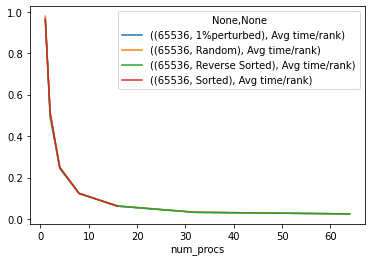

In [21]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["comp"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [22]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Graphs

## time

In [23]:
ctk.dataframe.loc["main"]

(65536, 1%perturbed) (65536, Random) (65536, Reverse Sorted)  \
                 Avg time/rank   Avg time/rank           Avg time/rank   
num_procs                                                                
1                     1.232038        1.590814                1.214821   
2                     1.043822        1.025334                1.211747   
4                     0.631684        0.653670                0.873902   
8                     0.626502        0.652286                0.874051   
16                    0.818987        0.848354                0.837077   
32                    1.822433        1.447861                1.394903   
64                    2.882452        2.599620                2.505010   

          (65536, Sorted) (262144, 1%perturbed) (262144, Random)  \
            Avg time/rank         Avg time/rank    Avg time/rank   
num_procs                                                          
1                1.218285              4.131854         4.143006   
2                1.041394              2.604852         2.602096   
4                0.613942              1.435547         1.445338   
8                0.628973              1.031101         1.026351   
16               1.262660              1.068802         1.052555   
32                    NaN              1.561212         1.537433   
64               2.730312              2.786485         2.668049   

          (262144, Reverse Sorted) (262144, Sorted) (1048576, 1%perturbed)  \
                     Avg time/rank    Avg time/rank          Avg time/rank   
num_procs                                                                    
1                         4.131628         4.107199              15.865853   
2                         2.661277         2.877565               9.292026   
4                         1.435883         1.432109               4.780063   
8                         1.017314         1.030022               2.761032   
16                        1.044279         1.042765                    NaN   
32                        1.496371         1.567205                    NaN   
64                        2.768982         2.706239                    NaN   

          (1048576, Random) (1048576, Reverse Sorted) (1048576, Sorted)  \
              Avg time/rank             Avg time/rank     Avg time/rank   
num_procs                                                                 
1                 15.923825                 15.753438         15.721955   
2                  8.945882                  9.189419          8.805542   
4                  4.735398                  4.708102          4.745004   
8                  2.767393                  2.752059          2.741089   
16                 1.995844                  1.976988          2.027011   
32                 2.297252                  2.298174          2.310750   
64                 3.908992                  3.859057          3.881137   

          (4194304, 1%perturbed) (4194304, Random) (4194304, Reverse Sorted)  \
                   Avg time/rank     Avg time/rank             Avg time/rank   
num_procs                                                                      
1                      62.781933         62.410328                 62.338200   
2                      34.660888         32.713537                 32.945949   
4                      16.386622         16.568951                 15.858858   
8                       8.498170          8.493937                  8.371054   
16                      4.804057          4.746376                  4.652227   
32                      3.506762          3.325191                  3.315738   
64                      4.772743          4.679455                  4.679797   

          (4194304, Sorted) (16777216, 1%perturbed) (16777216, Random)  \
              Avg time/rank           Avg time/rank      Avg time/rank   
num_procs                                                                
1                 63.675934      

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


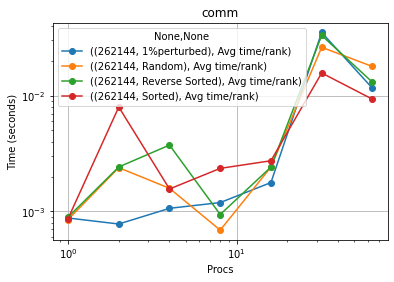

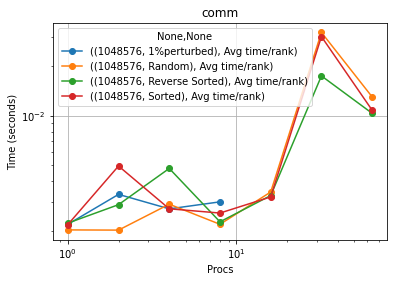

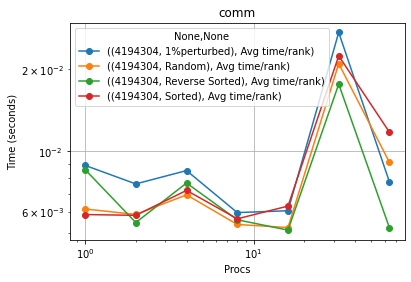

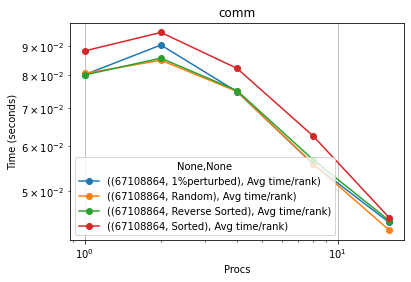

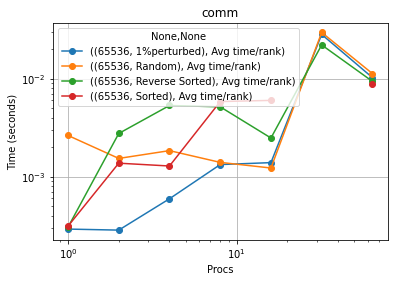

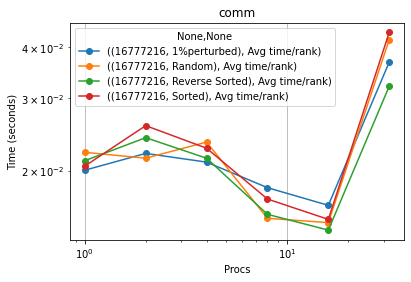

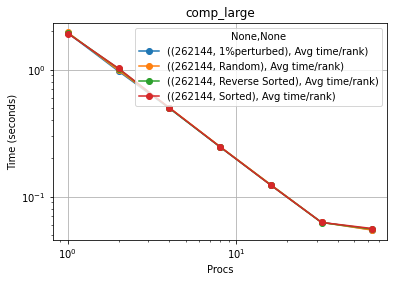

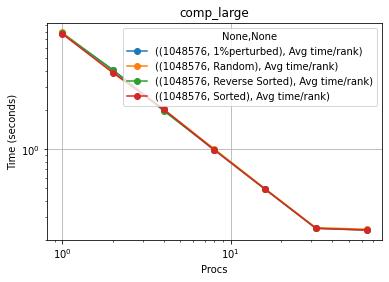

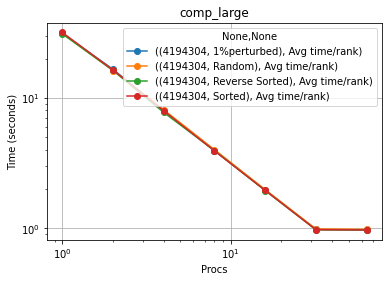

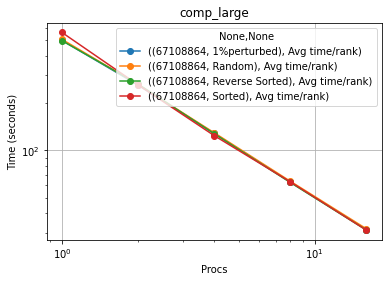

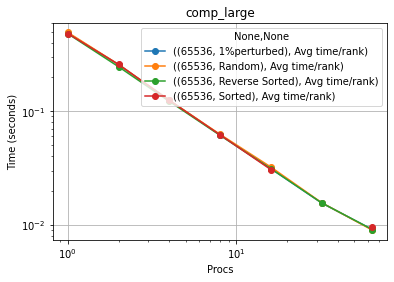

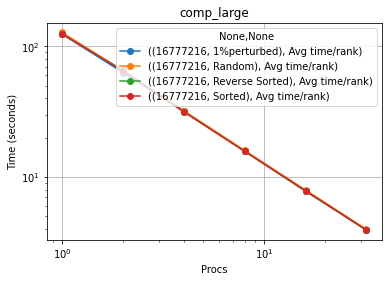

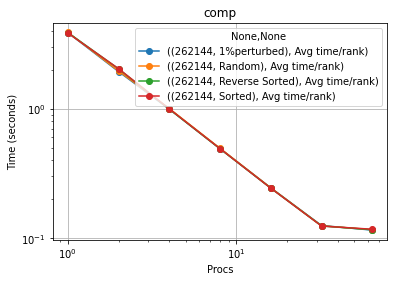

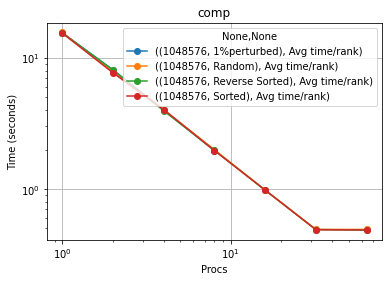

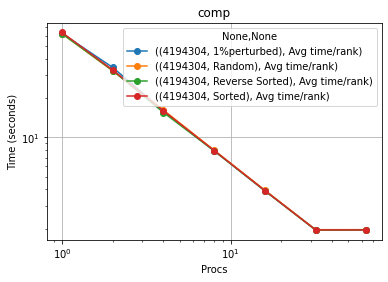

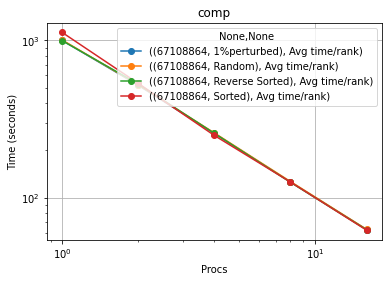

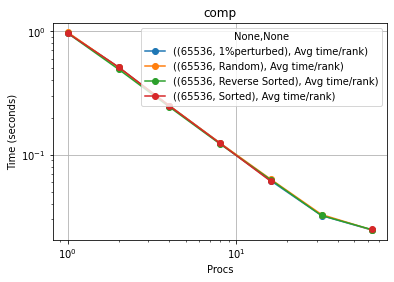

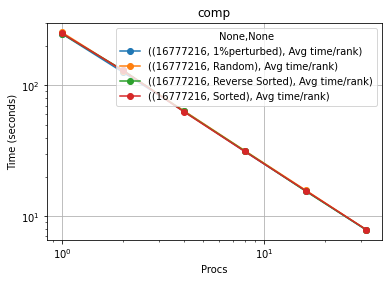

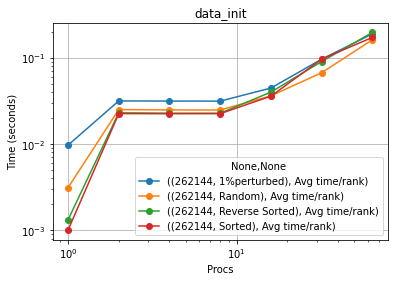

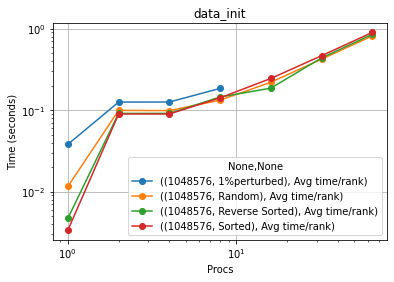

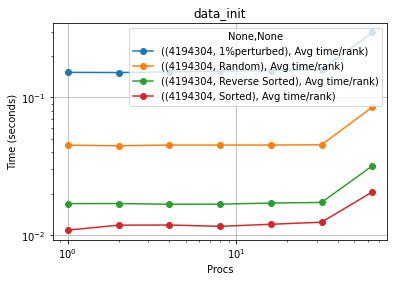

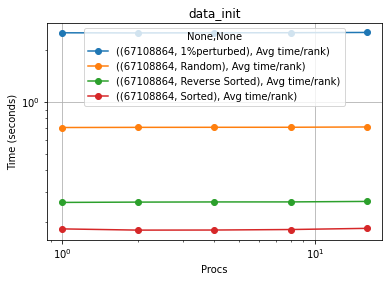

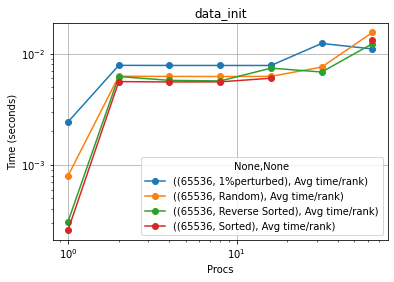

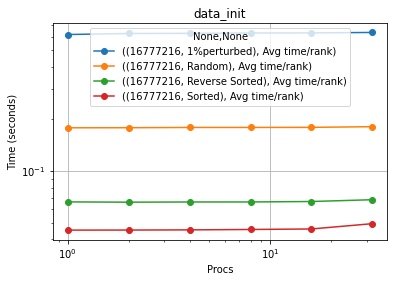

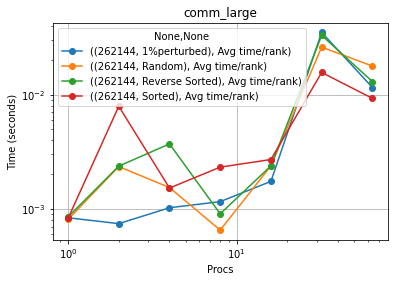

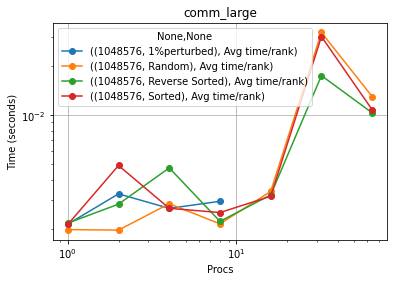

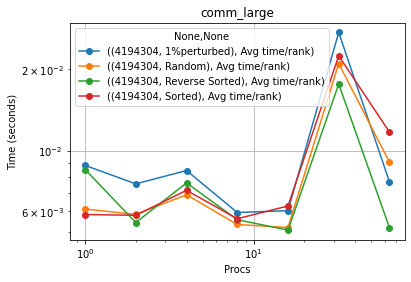

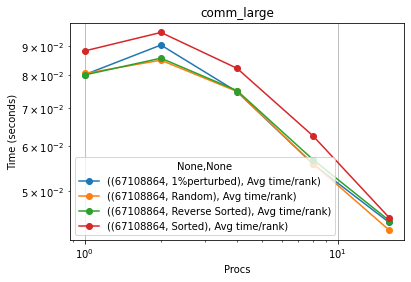

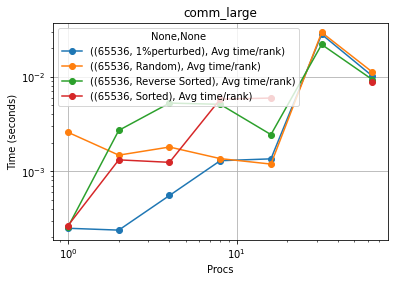

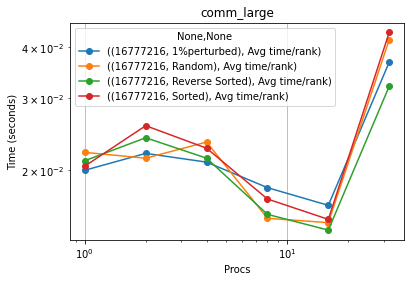

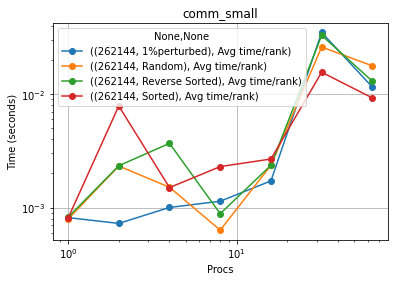

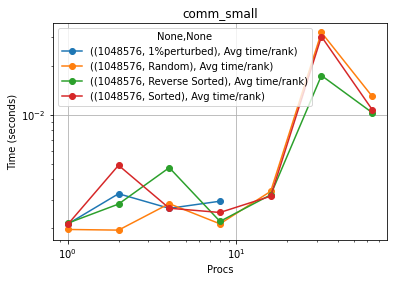

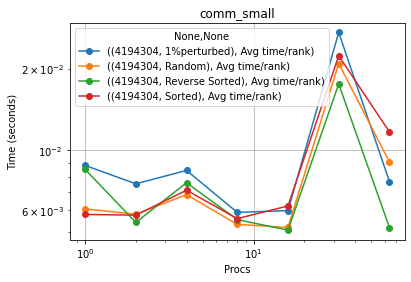

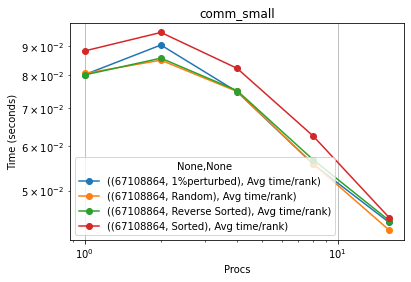

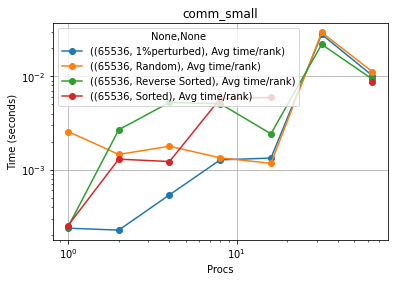

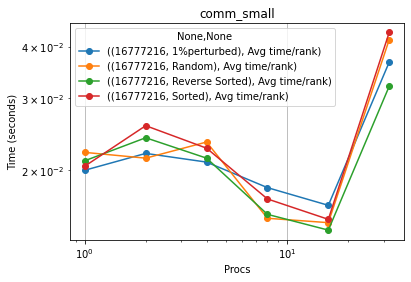

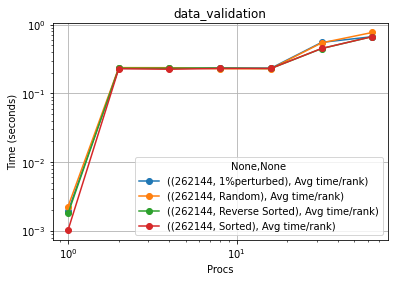

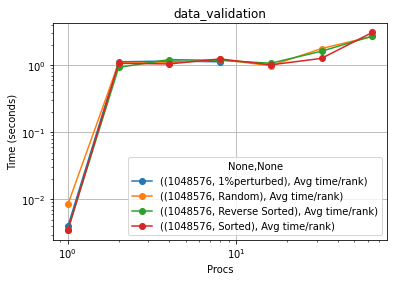

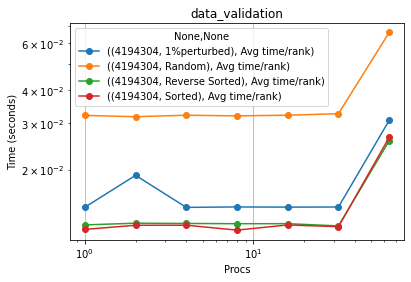

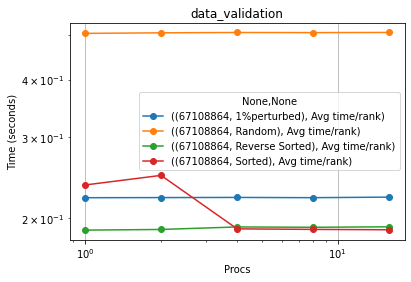

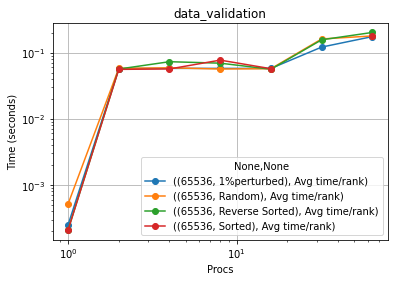

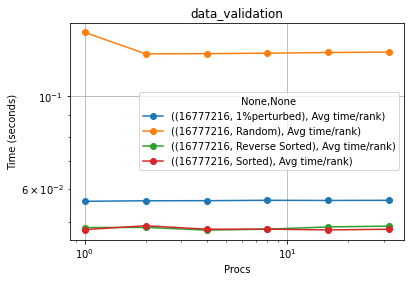

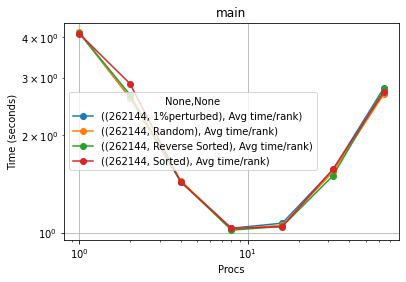

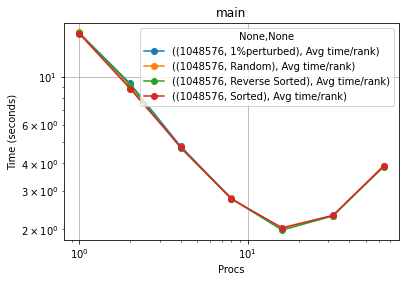

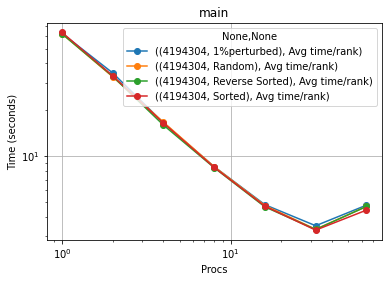

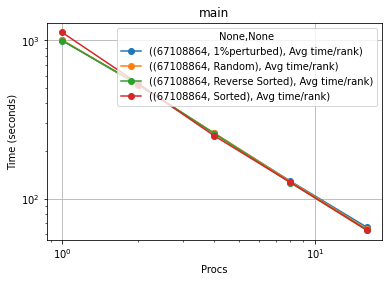

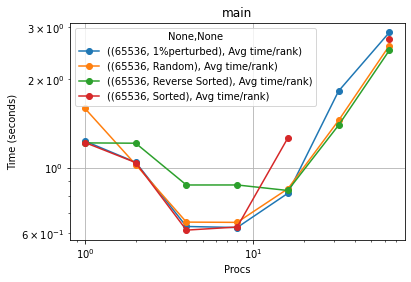

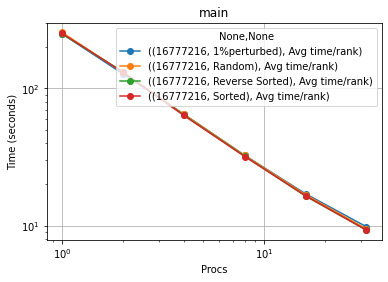

In [24]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

In [25]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg GPU time/rank"]].loc[name],
            title=name,
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=aTrue
        )

NameError: name 'aTrue' is not defined

## Speedup

In [ ]:
ctk.dataframe

In [ ]:
temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["comp"]
temp_df.iloc[0]/temp_df
#speedup example



In [ ]:
for name in function_names:
    for size in input_sizes:
        temp_df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name]
        
        plot_pandas(
            df=temp_df.iloc[0]/temp_df,
            title=f"{name}: thread-1/thread-N",
            xlabel="Threads",
            ylabel="Speedup",
            loglog=False
        )

# speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

# for name in function_names:
#     plot_pandas(
#         df=speedup_df.loc[name],
#         title=f"{name}: thread-1/thread-N",
#         xlabel="Threads",
#         ylabel="Speedup",
#         loglog=False
#     )

In [ ]:
ctk.dataframe.index